# Prediçao de ritmo cardiaco

Resumo sobre o projeto

# 0.0 importaçoes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [2]:
df_raw = pd.read_csv(r'C:\Users\st_hm\OneDrive\Área de Trabalho\IBM 2021\2 quanam\quanam_broker.csv',sep =';' )
df_raw

,ID,ILLUM,HUMID,CO2,SOUND,TEMP,RYTHM
0,1,546.27,64.61,493.64,26.18,21.30,78.00
1,2,467.90,65.59,486.10,41.06,23.27,92.39
2,3,387.14,70.23,501.81,25.93,18.77,85.17
3,4,339.75,74.72,535.88,30.50,19.41,80.76
4,5,521.01,64.09,492.80,40.96,20.30,81.00
...,...,...,...,...,...,...,...
3195,3196,549.06,67.97,553.70,27.40,16.49,76.93
3196,3197,408.51,63.25,516.07,28.51,20.22,84.96
3197,3198,459.01,56.65,453.37,25.81,19.04,83.65
3198,3199,545.56,68.65,487.74,26.41,21.87,84.38


## 0.1 Informaçoes das colunas (features)
- ID - Tag da mediçao
- ILLUM - Valor medido de iluminaçao (Lux)
- HUMID - Valor medido de umidade (%)
- CO2 - Valor medido da concentraçao de CO2 (PPM)
- SOUND - Valor do ruido sonoro (DB)
- TEMP - Valor da temperatura (C)
- RYTHM - Valor medido do ritmo cardiaco 


# 1.0 Descriçao dos dados

In [3]:
df1 = df_raw.copy()
df1

,ID,ILLUM,HUMID,CO2,SOUND,TEMP,RYTHM
0,1,546.27,64.61,493.64,26.18,21.30,78.00
1,2,467.90,65.59,486.10,41.06,23.27,92.39
2,3,387.14,70.23,501.81,25.93,18.77,85.17
3,4,339.75,74.72,535.88,30.50,19.41,80.76
4,5,521.01,64.09,492.80,40.96,20.30,81.00
...,...,...,...,...,...,...,...
3195,3196,549.06,67.97,553.70,27.40,16.49,76.93
3196,3197,408.51,63.25,516.07,28.51,20.22,84.96
3197,3198,459.01,56.65,453.37,25.81,19.04,83.65
3198,3199,545.56,68.65,487.74,26.41,21.87,84.38


## 1.1 Dimensão dos dados

In [4]:
print ("Numero de linhas: {}".format(df1.shape[0]))
print ("Numero de colunas: {}".format(df1.shape[1]))

Numero de linhas: 3200
Numero de colunas: 7


In [5]:
df1.dtypes

ID         int64
ILLUM    float64
HUMID    float64
CO2      float64
SOUND    float64
TEMP     float64
RYTHM    float64
dtype: object

In [6]:
df1.describe()

,ID,ILLUM,HUMID,CO2,SOUND,TEMP,RYTHM
count,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000
mean,1600.500000,439.163412,67.086106,501.620666,29.840194,20.042578,80.156616
std,923.904757,89.915142,4.776214,42.951183,6.158710,1.648479,6.755854
min,1.000000,145.480000,51.860000,352.820000,8.060000,14.760000,55.370000
25%,800.750000,377.060000,63.770000,471.427500,25.550000,18.920000,75.657500
50%,1600.500000,437.375000,66.935000,502.350000,29.885000,20.050000,80.220000
75%,2400.250000,500.792500,70.330000,530.142500,33.932500,21.180000,84.660000
max,3200.000000,775.140000,83.900000,672.380000,53.780000,26.290000,108.900000


In [7]:
df1.isna().sum()

ID       0
ILLUM    0
HUMID    0
CO2      0
SOUND    0
TEMP     0
RYTHM    0
dtype: int64

In [8]:
#Central Tendency - mean, median
df1_mean = pd.DataFrame(df1.apply(np.mean)).T
df1_median = pd.DataFrame(df1.apply(np.median)).T

#Dispersion - std, min, max, range, skew, kurtosis
df1_std = pd.DataFrame(df1.apply(np.std)).T
df1_max = pd.DataFrame(df1.apply(max)).T
df1_min = pd.DataFrame(df1.apply(min)).T
df1_range = pd.DataFrame(df1.apply(lambda x: x.max() - x.min())).T
df1_skew = pd.DataFrame(df1.apply(lambda x: x.skew())).T
df1_kurt = pd.DataFrame(df1.apply(lambda x: x.kurtosis())).T

#concatenate 
num = pd.concat([df1_min, df1_max, df1_range, df1_mean, df1_median, df1_std, df1_skew,df1_kurt]).T.reset_index()
num.columns = (['attributes','min','max','range','mean','median','std','skew','kurtosis'])
num

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,ID,1.00,3200.00,3199.00,1600.500000,1600.500,923.760386,0.000000,-1.200000
1,ILLUM,145.48,775.14,629.66,439.163412,437.375,89.901092,0.004456,-0.050162
2,HUMID,51.86,83.90,32.04,67.086106,66.935,4.775468,0.101302,-0.112579
3,CO2,352.82,672.38,319.56,501.620666,502.350,42.944471,0.037787,0.026974
4,SOUND,8.06,53.78,45.72,29.840194,29.885,6.157748,-0.038358,0.012988
5,TEMP,14.76,26.29,11.53,20.042578,20.050,1.648222,0.014462,-0.133763
6,RYTHM,55.37,108.90,53.53,80.156616,80.220,6.754798,0.004693,0.076787


# 2.0 Analise exploratoria

In [9]:
df2 = df1.copy()

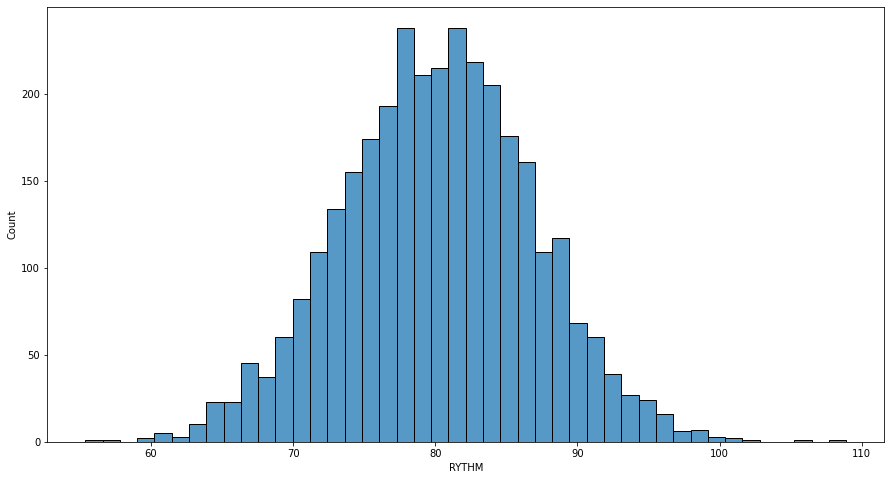

In [10]:
plt.figure(figsize=(15, 8))
sns.histplot(df2['RYTHM']);

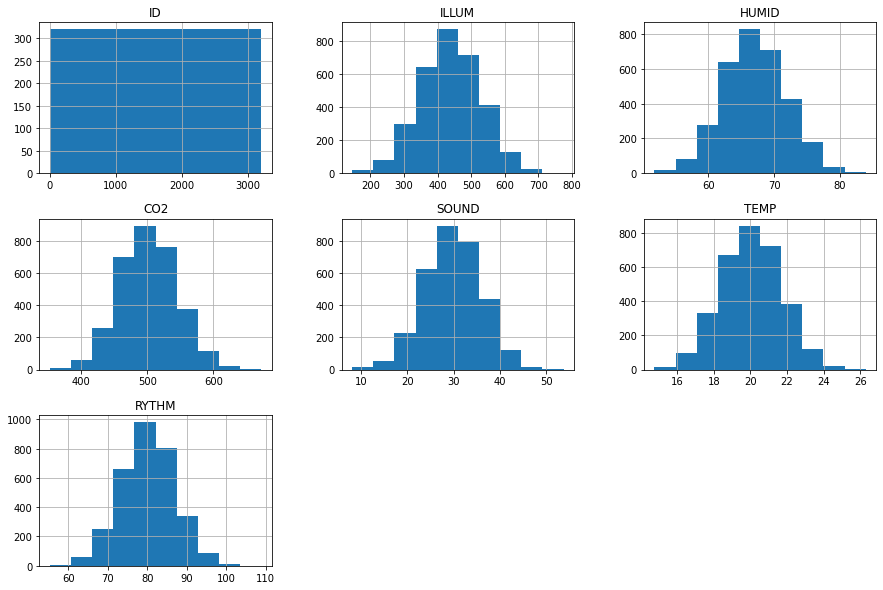

In [11]:
df2.hist(figsize=(15,10));

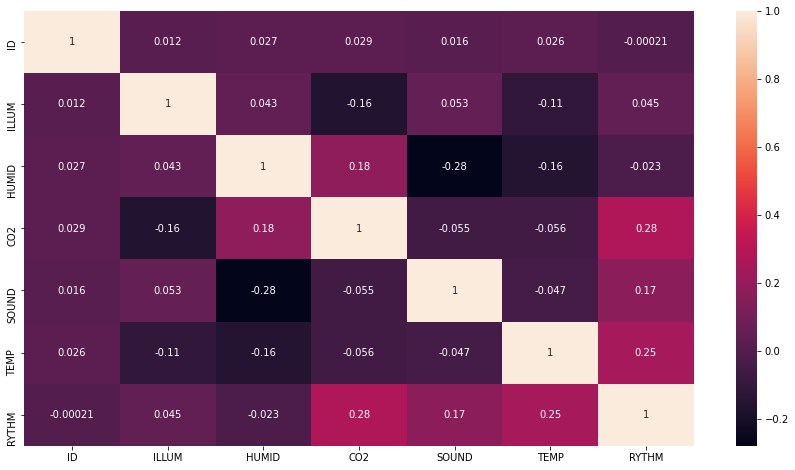

In [12]:
plt.figure(figsize=(15, 8))
sns.heatmap(df2.corr(method='pearson'), annot = True);

# 3.0 Preparaçao dos dados

In [13]:
df3 = df2.copy()

# 4.0 Modelos de machine learning

In [14]:
df4 =  df3.copy()

In [15]:
features = ['ILLUM', 'HUMID','CO2', 'SOUND', 'TEMP']
target = ['RYTHM']

X = df4[features]
y = df4[target]

In [16]:
seed = 12
test_pct = 0.3 # Separaremos 30% dos dados para testes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_pct)

In [17]:
#LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = r2_score(y_test, y_pred)
print(f"R² do modelo LinearRegression: {acc}")

R² do modelo LinearRegression: 0.23618047296086886


In [18]:
#Lasso
model = Lasso(alpha = 0.01, random_state=seed)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = r2_score(y_test, y_pred)
print(f"R² do modelo Lasso: {acc}")

R² do modelo Lasso: 0.2360010889573655


In [19]:
#RamdomForest
model = RandomForestRegressor(n_estimators = 100, n_jobs=-1, random_state=seed)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = r2_score(y_test, y_pred)
print(f"R² do modelo RamdomForest: {acc}")

R² do modelo RamdomForest: 0.18002863342338504


<ipython-input-19-3afc6787b425>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


In [20]:
steps=[0.01,0.05,0.1,0.5, 0.75, 1]
for x in steps:  
    model = Lasso(alpha = x, random_state=seed)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = r2_score(y_test, y_pred)
    print(f"R² do modelo RamdomForest: {acc}")

R² do modelo RamdomForest: 0.2360010889573655
R² do modelo RamdomForest: 0.23526043936390384
R² do modelo RamdomForest: 0.23428275564601175
R² do modelo RamdomForest: 0.22448726720488954
R² do modelo RamdomForest: 0.21688801543975844
R² do modelo RamdomForest: 0.20821005556783534


# 6.0 Aplicaçao da tabela teste

In [21]:
df_answers = pd.read_csv(r'C:\Users\st_hm\OneDrive\Área de Trabalho\IBM 2021\2 quanam\tabelaTeste.csv')
df_answers

,ID,ILLUM,HUMID,CO2,SOUND,TEMP,RYTHM
0,0,337.90,63.29,518.13,22.38,18.59,0.0
1,1,342.96,63.19,488.85,37.36,20.41,0.0
2,2,369.86,57.39,516.86,26.45,20.89,0.0
3,3,304.65,67.80,517.50,32.98,22.52,0.0
4,4,442.25,68.21,500.91,37.28,21.88,0.0
...,...,...,...,...,...,...,...
795,795,421.39,55.97,451.86,29.25,18.96,0.0
796,796,572.90,59.42,502.12,36.12,19.70,0.0
797,797,460.78,64.28,560.54,31.20,15.11,0.0
798,798,499.75,67.20,536.88,30.68,17.57,0.0


In [22]:
df_answers.describe()

,ID,ILLUM,HUMID,CO2,SOUND,TEMP,RYTHM
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.0
mean,399.5000,437.067288,66.601225,496.862513,30.516137,20.064812,0.0
std,231.0844,84.935208,5.069337,42.172339,6.347332,1.664799,0.0
min,0.0000,95.050000,48.350000,350.510000,13.340000,14.960000,0.0
25%,199.7500,381.865000,63.177500,468.780000,26.307500,18.937500,0.0
50%,399.5000,434.345000,66.565000,496.825000,30.465000,20.010000,0.0
75%,599.2500,496.280000,70.235000,524.467500,35.010000,21.182500,0.0
max,799.0000,741.840000,80.200000,652.550000,50.340000,25.890000,0.0


In [23]:
features_answers = ['ILLUM', 'HUMID', 'CO2', 'SOUND', 'TEMP']
target_answers = ['RYTHM']

X_answers = df_answers[features]
y_answers = df_answers[target]

In [24]:
model = Lasso(alpha = 0.5)
model.fit(X_train, y_train)

y_pred = model.predict(X_answers)

In [25]:
df_answers['RYTHM'] = y_pred

In [26]:
df_answers.to_csv(r'C:\Users\st_hm\OneDrive\Área de Trabalho\IBM 2021\2 quanam\ANSWERS.csv', index=False)